1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Post Profiling](#section304)<br/>
4. [Exploratory Data Analysis](#section4)
    - 4.1 [Histograms for categorical variables](#section401)<br/>
    - 4.2 [Check for Co-relation](#section402)<br/>
    - 4.3 [Check for distribution bias](#section403)<br/>
    - 4.4 [Which BodyType has highest market share by number?](#section404)<br/>
    - 4.5 [What is distribution of Bodytype of Top 5 companies by volume?](#section405)<br/>
    - 4.6 [What is distribution of Bodytype of Top 5 companies by Revenue?](#section406)<br/>
    - 4.7 [What is the trend Analysis for Body Types by count?](#section407)<br/>
    - 4.8 [What is the trend Analysis for Body Types by revenue?](#section408)<br/>
     

5. [Regression](#section5)<br/>  
    - 5.1 [Preparing X and y using pandas](#section401)<br/>
    - 5.2 [Linear Regression iterations](#section402)<br/>
    - 5.3 [Use of Random Forest Regressor](#section403)<br/>
    - 5.4 [Calculating the magnitude of coefficients using __RandomForestRegressor__](#section404)<br/>
    
    
6. [Conclusions ](#section5)<br/>  

## 1. Problem Statement ![title](Candy.PNG)

The goal is to __predict winpercent__ (overall win percentage) for a candy in  __Candy Dataset__ using __appropriate regression models__.

- We want to find a model that given inputs what will be the  __winpercent__.
- Which features __contribute__  the most to __winpercent__.?


### 2. Data Loading and Description

- The dataset comprises of __85 observations of 13 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| chocolate   | Does it contain chocolate?                                          | 
| fruity      | Is it fruit flavored?                         |  
| caramel          | Is there caramel in the candy?                                        |   
| peanutalmondy        | Does it contain peanuts, peanut butter or almonds?                                           | 
| nougat           | Does it contain nougat?                                         |
| crispedricewafer   | Does it contain crisped rice, wafers, or a cookie component?                                         |
| hard         |Is it a hard candy? |
| pluribus         | Is it a candy bar |
| sugarpercent        | The percentile of sugar it falls under within the data set.    |                                      
| pricepercent| The unit price percentile compared to the rest of the set.                                           |
| winpercent        |The overall win percentage according to 269,000 matchups.                                             |

__Importing Packages__

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline
import warnings                                                   # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

#### Importing the Dataset

In [336]:
import pandas as pd
path = "D:\\NI\\INS\\term2_ml\\project\\"
filename = "candy-data.csv"
candy = pd.read_csv(path+filename) 
candy.head() 

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## 3. Data Profiling

### 3.1 Understanding the Dataset

- In the upcoming sections we will first __understand our dataset__ using various columns.
- Then with the help of  profiling we will find which columns of our dataset need preprocessing.
- In preprocessing we will deal with erronous and missing values of columns. 
- Again If required we will do  profiling to see how preprocessing have transformed our dataset.

In [355]:
candy.head() 

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


What are the **features**?
- Categorical : chocolate, fruity caramel, peanutyalmondy, nougat, crispedricewafer ,hard ,bar ,pluribus ,sugarpercent , pricepercent 	
- Continous : sugarpercent, pricepercent


What is the **response**?
- winpercent: The overall win percentage

In [6]:
candy.shape

(85, 13)

In [8]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


In [9]:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [13]:
candy.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

From the above output we can see that no columns contains __no 0 and null values__ . __No Pre-processing required__.

### 3.2 Pre-Profiling

In [17]:
profile = pandas_profiling.ProfileReport(candy)
profile.to_file(outputfile="candy_preprocessing.html")

### 3.3 Post-Profiling

#### Dropping competitorname as it has high ordinal value after report

In [357]:
candyn = candy.drop('competitorname',axis=1)
candyn.head(2)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936


## 4. Exploratory Data Analysis

#### Function to plot histograms for categorical variables

In [31]:
def plothist(df,column,nbin):
    # set plot figure size
    plt.figure(figsize=(8,3))
    df1 = df[df[column] ==1 ] 
    df1['winpercent'].plot(kind='hist', bins = nbin, alpha = 0.75, label = column + "= 1")
    df0 = df[df[column] ==0 ]  
    df0['winpercent'].plot(kind='hist', bins = nbin, alpha = 0.75, label = column +"= 0")                                    
    # provide legend
    plt.legend()
    # provide xlabel
    plt.xlabel('winpercent')


#### Function to check bias for or categorical variables

In [204]:
def cat_plot(df,column):
    df[column].value_counts().sort_index().plot(kind='bar',figsize = (6, 2),legend ='True', title = column )

### 4.1 Histograms for categorical variables

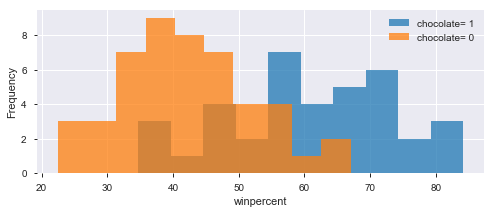

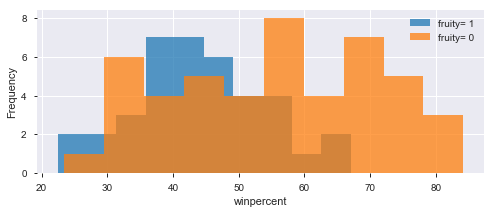

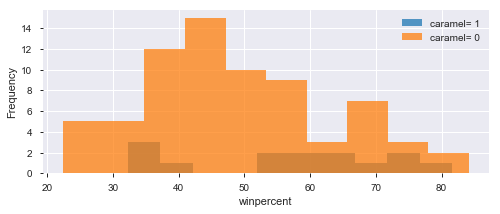

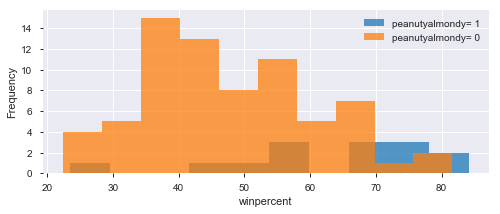

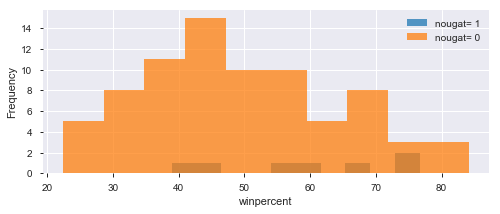

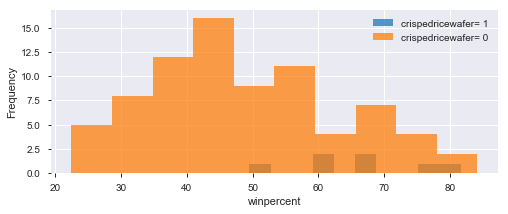

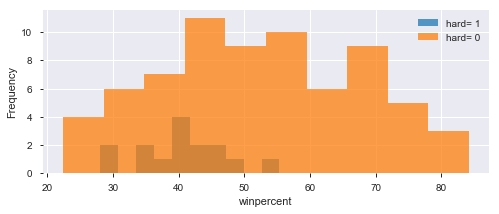

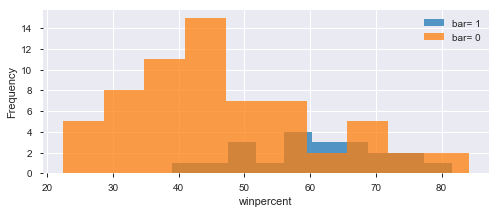

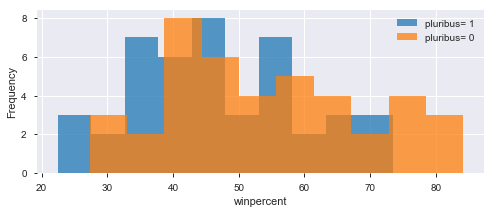

In [432]:
plothist(candy,'chocolate',10)
plothist(candy,'fruity',10)
plothist(candy,'caramel',10)
plothist(candy,'peanutyalmondy',10)
plothist(candy,'nougat',10)
plothist(candy,'crispedricewafer',10)
plothist(candy,'hard',10)
plothist(candy,'bar',10)
plothist(candy,'pluribus',10)

# 


- Chocolate flavor 1 has equitable distribution for higher winpercent
- Fruity flavor 0 has increases  winpercent
- Caramel data has little bearing
- peanutyalmondy 1 data has somewhat increases winprecent

### 4.2 Check for Co-relation

In [35]:
candyn.corr()


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151


Text(0.5,1,'Correlation between features')

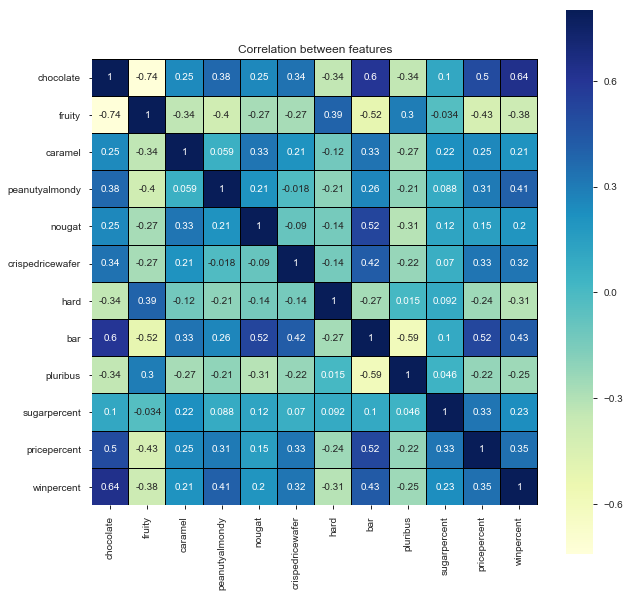

In [362]:
# HeatMap
plt.figure(figsize=(10,10))
sns.heatmap(candyn.corr(), vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- Chocolate flavor  has strong corelation winpercent
- Fruity and Choclate has strong -ve correlation so we can drop fruity


### 4.3 Check for distribution bias

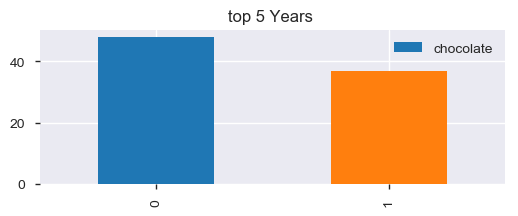

In [202]:
candyn['chocolate'].value_counts().sort_index().plot(kind='bar',figsize = (6, 2),legend ='True', title = 'Chocolate ' )

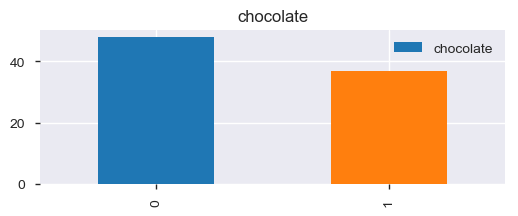

In [210]:
cat_plot(candy,'chocolate')

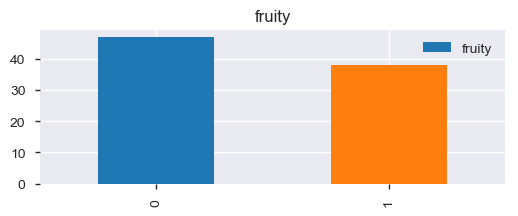

In [211]:
cat_plot(candy,'fruity')

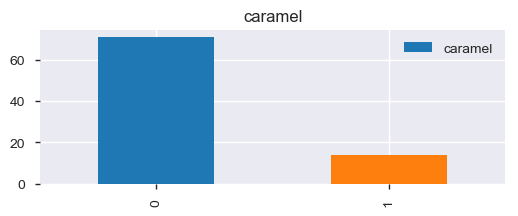

In [212]:
cat_plot(candy,'caramel')

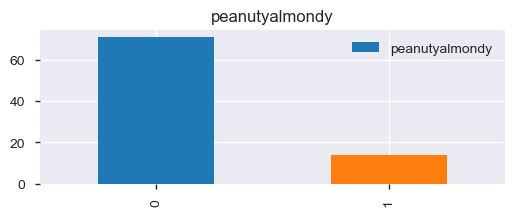

In [213]:
cat_plot(candy,'peanutyalmondy')

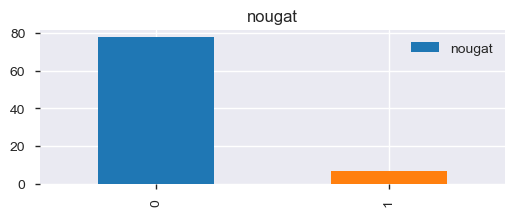

In [214]:
cat_plot(candy,'nougat')

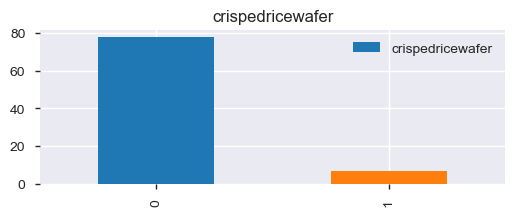

In [215]:
cat_plot(candy,'crispedricewafer')

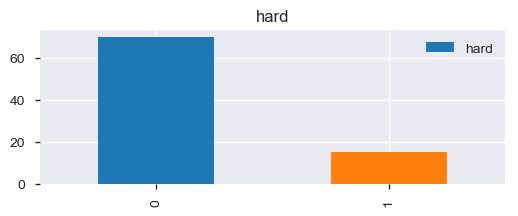

In [220]:
cat_plot(candy,'hard')

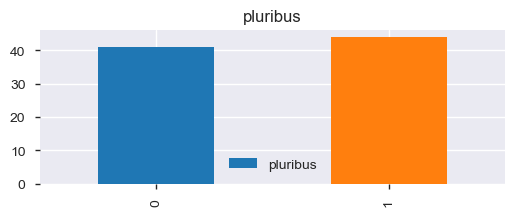

In [219]:
cat_plot(candy,'pluribus')

## 5. Regression

### 5.1 Preparing X and y using pandas

In [366]:
# Output variable y
y = candydrop['winpercent']
y.head()

0    66.971725
1    67.602936
2    32.261086
3    46.116505
4    52.341465
Name: winpercent, dtype: float64

- Function for Linear regression

In [382]:
def run_reg(X,y):
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
    print('Train cases as below')
    print('X_train shape: ',X_train.shape)
    print('y_train shape: ',y_train.shape)
    print('\nTest cases as below')
    print('X_test shape: ',X_test.shape)
    print('y_test shape: ',y_test.shape)  
    print('\n')

    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    y_pred_test = linreg.predict(X_test) 
    y_pred_train = linreg.predict(X_train) 
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
    print('\n')
    from sklearn.metrics import r2_score
    R2_test = r2_score(y_test, y_pred_test)
    R2_train = r2_score(y_train, y_pred_train)
    print('R-Square for training set is {}'.format(R2_train))
    print('R-Square  for test set is {}'.format(R2_test))
    print('\n')
    adjusted_r_squared = 1 - (1-R2_test)*(len(y)-1)/(len(y)-X.shape[1]-1)
    t_adjusted_r_squared = 1 - (1-R2_train)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('Adjusted R-Square for test set is {}'.format(adjusted_r_squared))
    print('Adjusted R-Square  for training set is {}'.format(t_adjusted_r_squared))
    print('\n')

    print('Intercept:',linreg.intercept_)          # print the intercept 
    print('Coefficients:',linreg.coef_)  
    print('\n')

   # fcols = ['chocolate','peanutyalmondy'] 
    fcols = X.columns.tolist()
    fcols.insert(0,'Intercept')
    coef = linreg.coef_.tolist()            
    coef.insert(0, linreg.intercept_)  

    eq1 = zip(fcols, coef)

    for c1,c2 in eq1:
        print(c1,c2)
    

### 5.2 Linear Regression iterations

In [387]:
# drop 'fruity','nougat','pluribus','sugarpercent','crispedricewafer'
X = candyn.drop(['winpercent','fruity','nougat','pluribus','sugarpercent','crispedricewafer'],axis=1)
# X = candyn.drop(['winpercent','nougat','pluribus','sugarpercent','caramel','pricepercent','hard','bar','crispedricewafer'],axis=1)
X.head()
run_reg(X,y)

Train cases as below
X_train shape:  (72, 6)
y_train shape:  (72,)

Test cases as below
X_test shape:  (13, 6)
y_test shape:  (13,)


RMSE for training set is 11.113762215540676
RMSE for test set is 9.86981466122024


R-Square for training set is 0.42099372431929083
R-Square  for test set is 0.5465405090456459


Adjusted R-Square for test set is 0.5116590097414648
Adjusted R-Square  for training set is 0.3764547800361593


Intercept: 42.38022622569662
Coefficients: [13.48724176 -0.49624696  7.92216801 -3.30679664  1.76955     2.0825304 ]


Intercept 42.38022622569662
chocolate 13.487241759533644
caramel -0.49624695939801805
peanutyalmondy 7.922168014552897
hard -3.3067966358154135
bar 1.7695499998099482
pricepercent 2.0825303973883407


- __Adjusted R-square__ explains __52%__ of variance 
- __Caramel,Hard, Bar, priceprecent__ can be dropped.
- Candies which contains __chocolate__ is 13.748 percentage points higher in terms of winpercent compared to candies with __no chocolate__
- Candies which contains __peanutyalmondy__ is 7.92 percentage points higher in terms of winpercent compared to candies with __no peanutyalmondy__ 

##### _Drop Other columns and try_

In [390]:
# drop 'fruity','nougat','pluribus','sugarpercent','caramel','pricepercent','hard','bar','crispedricewafer'
X = candyn.drop(['winpercent','fruity','nougat','pluribus','sugarpercent','caramel','pricepercent','hard','bar','crispedricewafer'],axis=1)
# X = candyn.drop(['winpercent','nougat','pluribus','sugarpercent','caramel','pricepercent','hard','bar','crispedricewafer'],axis=1)
X.head()
run_reg(X,y)

Train cases as below
X_train shape:  (72, 2)
y_train shape:  (72,)

Test cases as below
X_test shape:  (13, 2)
y_test shape:  (13,)


RMSE for training set is 11.221208285009476
RMSE for test set is 9.57739874204914


R-Square for training set is 0.40974412677090355
R-Square  for test set is 0.5730120298969794


Adjusted R-Square for test set is 0.5625976891627593
Adjusted R-Square  for training set is 0.39534764205799877


Intercept: 42.138983361111116
Coefficients: [15.55127107  8.55149692]


Intercept 42.138983361111116
chocolate 15.551271066666668
peanutyalmondy 8.551496916666666


- __Adjusted R-square__ explains __56%__ of variance 
- Candies which contains __chocolate__ is 15.55 percentage points higher in terms of winpercent compared to candies with __no chocolate__
  


### 5.3 Use of Random Forest Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting./n

- For this usage lets pass all feature columns only dropping output


In [399]:
# use all other columns
Z = candyn.drop(['winpercent'],axis=1)
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.15, random_state=1)

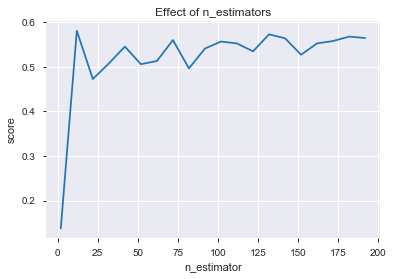

In [400]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(2, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(Z_train, y_train)
    scores.append(model.score(Z_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [410]:
max(scores)

0.5811250663448811

- As seen above the score maximum is __.58__ using __RandomForestRegressor__ technique

### 5.4 Calculating the magnitude of coefficients using __RandomForestRegressor__

In [402]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Xreg = candyn.drop(['winpercent'])
candyn.head()
F = candyn.drop('winpercent',axis=1)

In [411]:
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=200)
regr.fit(F, y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [412]:
print(regr.feature_importances_)
regr.feature_importances_

[6.98578694e-01 3.55404896e-02 4.20310406e-03 5.23674470e-02
 5.08394896e-04 9.56800539e-03 2.18861369e-03 1.05753384e-02
 3.34298821e-03 8.65053425e-02 9.66215824e-02]


array([6.98578694e-01, 3.55404896e-02, 4.20310406e-03, 5.23674470e-02,
       5.08394896e-04, 9.56800539e-03, 2.18861369e-03, 1.05753384e-02,
       3.34298821e-03, 8.65053425e-02, 9.66215824e-02])

In [426]:
LR2 = regr.score(F, y, sample_weight=None)
LR2

0.5407053002243086

In [427]:
## calculating coefficients

coeff = pd.DataFrame(F.columns)

coeff['Coefficient Estimate'] = pd.Series(regr.feature_importances_)
# coeff.sort()
coeff.sort_values("Coefficient Estimate", axis = 0, ascending = False, inplace = True, na_position ='last') 
coeff

,0,Coefficient Estimate
0,chocolate,0.698579
10,pricepercent,0.096622
9,sugarpercent,0.086505
3,peanutyalmondy,0.052367
1,fruity,0.035540
7,bar,0.010575
5,crispedricewafer,0.009568
2,caramel,0.004203
8,pluribus,0.003343
6,hard,0.002189


- As expected __Chocolate__ has the highest significance

## 6. Conclusions

-  __RandomForestRegressor__ is best model for this dataset  (__From: Section 5.3__)
- This model can explain __58.11 percent__ of variance
- Chocolate feature has the __higest impact for winning percentage__

